In [ ]:
# Подключаем Google Drive
from google.colab import drive
import os
import openai
import time
import base64
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
!pip install pdf2image

In [ ]:
import cv2
import numpy as np
import yaml
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
from pdf2image import convert_from_path

In [ ]:
!apt-get update
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8
!export LANG=en_US.UTF-8
!export LC_ALL=en_US.UTF-8
!apt-get install -y poppler-utils

# **Обучение модели Yolov8 для выделения нужных баундинбоксов. Это необходимо для того чтобы делать распознавание только нужной части на изображении.**

In [ ]:
import zipfile

# ✅ Распаковка архива вручную
zip_path = "/content/drive/MyDrive/Дипломный проект/5_этап/analyses.v9i.yolov8.zip"  # путь к вашему архиву
extract_path = "/content/analyses-9"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Архив успешно распакован!")

# ✅ Указываем путь к data.yaml и обновляем содержимое
yaml_path = os.path.join(extract_path, "data.yaml")

new_yaml_content = {
    "train": f"{extract_path}/train/images",
    "val": f"{extract_path}/valid/images",
    "test": f"{extract_path}/test/images",
    "names": {0: "table", 1: "text"}
}

with open(yaml_path, "w") as yaml_file:
    yaml.dump(new_yaml_content, yaml_file, default_flow_style=False, allow_unicode=True)

print(f"✅ Файл {yaml_path} успешно обновлен!")

# ✅ Обучаем модель YOLOv8
model = YOLO("yolov8m.pt")
model.train(data=yaml_path, epochs=50, imgsz=640, batch=8)

# ✅ Путь к сохранённой модели
trained_model_path = "/content/runs/detect/train/weights/best.pt"
print(f"✅ Обучение завершено! Веса сохранены в {trained_model_path}")

✅ Архив успешно распакован!
✅ Файл /content/analyses-9/data.yaml успешно обновлен!


Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/analyses-9/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3776854  ultralytics.nn.modules.head.Detect           [2, [192, 384, 576]]          
Model summary: 169 layers, 25,857,478 parameters, 25,857,462 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1382.9±905.7 MB/s, size: 66.2 KB)


train: Scanning /content/analyses-9/train/labels... 1806 images, 12 backgrounds, 0 corrupt: 100%|██████████| 1806/1806 [00:00<00:00, 2330.04it/s]

train: New cache created: /content/analyses-9/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 562.7±436.6 MB/s, size: 45.2 KB)


val: Scanning /content/analyses-9/valid/labels... 96 images, 2 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<00:00, 1799.29it/s]

val: New cache created: /content/analyses-9/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.34G       1.39      1.641      1.737         18        640: 100%|██████████| 226/226 [01:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.52it/s]

                   all         96         94      0.692      0.215      0.176     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.98G       1.44      1.452      1.726         18        640: 100%|██████████| 226/226 [01:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.69it/s]

                   all         96         94      0.732      0.156      0.143     0.0439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.05G      1.373      1.344      1.683         10        640: 100%|██████████| 226/226 [01:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all         96         94      0.824       0.29      0.315      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.11G       1.29      1.257      1.623         21        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96         94      0.928      0.353      0.404      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.18G      1.198      1.106      1.557         24        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.73it/s]

                   all         96         94      0.912      0.403      0.441      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.25G      1.151      1.075      1.509         23        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all         96         94      0.983      0.471      0.477      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.31G      1.072     0.9779      1.457         15        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

                   all         96         94      0.945      0.452      0.473       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.79G      1.038     0.9467      1.412         19        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.72it/s]

                   all         96         94      0.967      0.473      0.484      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.86G      1.025     0.9248      1.421         11        640: 100%|██████████| 226/226 [01:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all         96         94      0.979      0.462      0.485       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.92G     0.9709      0.854      1.372         24        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

                   all         96         94      0.972      0.462      0.484      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.99G     0.9614     0.8188      1.356         22        640: 100%|██████████| 226/226 [01:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all         96         94      0.994      0.477      0.487        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.3G     0.9131     0.7964      1.333         18        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all         96         94       0.99      0.457      0.487      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.37G     0.9026     0.7667      1.312         18        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

                   all         96         94      0.994      0.452      0.483      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.43G      0.903     0.7634      1.308         25        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]

                   all         96         94      0.982      0.468      0.484      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.74G     0.8577     0.7138      1.281         19        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]

                   all         96         94      0.987      0.462      0.476       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.81G     0.8563     0.7209      1.279         14        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.74it/s]

                   all         96         94      0.985      0.468      0.489      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.88G     0.8503     0.7161      1.282         19        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]

                   all         96         94      0.977      0.478      0.735      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.94G     0.8334     0.6829      1.261         23        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all         96         94      0.993      0.462       0.49      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.42G     0.8301     0.6875      1.262         15        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.46it/s]

                   all         96         94      0.991      0.462      0.492       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.48G     0.7932     0.6363       1.22         13        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.71it/s]

                   all         96         94      0.978      0.476      0.488       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.55G      0.778     0.6251      1.218         13        640: 100%|██████████| 226/226 [01:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all         96         94      0.978      0.465      0.489      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.62G     0.7815     0.6316      1.223         16        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all         96         94      0.977      0.484      0.491      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.93G     0.7592     0.6127      1.211         14        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.76it/s]

                   all         96         94      0.973      0.467      0.487      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         7G     0.7485     0.6036      1.207         14        640: 100%|██████████| 226/226 [01:04<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all         96         94      0.967      0.484      0.491      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.06G     0.7445     0.5982      1.207         14        640: 100%|██████████| 226/226 [01:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

                   all         96         94      0.982      0.478      0.493      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      7.13G     0.7251     0.5719      1.183         25        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all         96         94      0.994      0.454      0.482      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.77G     0.7191     0.5656       1.18         14        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.74it/s]

                   all         96         94      0.982      0.478      0.489      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.77G     0.7246     0.5726      1.178         23        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.63it/s]

                   all         96         94      0.983      0.484      0.491      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.77G     0.7091     0.5496      1.164         25        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.75it/s]

                   all         96         94      0.984      0.477      0.491      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.77G      0.693     0.5467      1.167         24        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]

                   all         96         94      0.978      0.495      0.496      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.8G     0.6673     0.5161      1.144         19        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.97it/s]

                   all         96         94      0.989      0.477      0.615      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       4.1G     0.6653     0.5199      1.155         21        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all         96         94      0.987      0.468      0.491      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.42G     0.6615      0.524      1.141         23        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all         96         94      0.984      0.489      0.492      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.49G     0.6673     0.5218      1.141         19        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.25it/s]

                   all         96         94       0.98      0.484      0.492      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.55G     0.6572     0.4981      1.139         16        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.79it/s]

                   all         96         94      0.987      0.473       0.49       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.86G     0.6646     0.5026       1.14         12        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]

                   all         96         94      0.989      0.471      0.491      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.93G     0.6425     0.4895      1.129         15        640: 100%|██████████| 226/226 [01:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.52it/s]

                   all         96         94      0.984      0.473      0.489      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.99G     0.6294     0.4736      1.127         23        640: 100%|██████████| 226/226 [01:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.82it/s]

                   all         96         94      0.992      0.468      0.494      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.31G     0.6298     0.4804      1.125         12        640: 100%|██████████| 226/226 [01:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.08it/s]

                   all         96         94      0.989      0.478       0.49      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.37G     0.6067     0.4526      1.108         25        640: 100%|██████████| 226/226 [01:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all         96         94      0.986      0.484      0.494      0.444


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.68G     0.5844     0.3893       1.15          6        640: 100%|██████████| 226/226 [01:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all         96         94      0.989      0.476      0.492      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.75G     0.5525     0.3651      1.123          6        640: 100%|██████████| 226/226 [01:02<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.88it/s]

                   all         96         94      0.984      0.489       0.49      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.82G     0.5405     0.3439      1.109          6        640: 100%|██████████| 226/226 [01:02<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.67it/s]

                   all         96         94      0.983      0.484      0.489      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.88G     0.5294     0.3246      1.106          6        640: 100%|██████████| 226/226 [01:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all         96         94      0.984      0.484      0.489       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.36G     0.5167     0.3228      1.092          6        640: 100%|██████████| 226/226 [01:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.89it/s]

                   all         96         94      0.979      0.489      0.488      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.42G     0.5045     0.3148      1.091          7        640: 100%|██████████| 226/226 [01:02<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.77it/s]

                   all         96         94      0.984      0.484       0.49      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.49G     0.4816     0.3025      1.065          6        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.78it/s]

                   all         96         94      0.979      0.488      0.492      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.56G     0.4787     0.2983      1.073          9        640: 100%|██████████| 226/226 [01:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.07it/s]

                   all         96         94      0.983      0.478      0.492      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.87G     0.4788     0.2957      1.059          6        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.81it/s]

                   all         96         94      0.984      0.484      0.492       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.93G     0.4573     0.2802      1.053          6        640: 100%|██████████| 226/226 [01:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  4.83it/s]

                   all         96         94      0.979      0.489      0.493      0.451



50 epochs completed in 0.915 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.45it/s]


                   all         96         94      0.977      0.478      0.735      0.622
                 table         93         93      0.954      0.957      0.972      0.845
                  text          1          1          1          0      0.497      0.398
Speed: 0.4ms preprocess, 11.0ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train
✅ Обучение завершено! Веса сохранены в /content/runs/detect/train/weights/best.pt



image 1/1 /content/drive/MyDrive/Дипломный проект/5_этап/test_files/photo_2025-04-26_16-00-34.jpg: 640x480 1 table, 45.4ms
Speed: 2.4ms preprocess, 45.4ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 480)


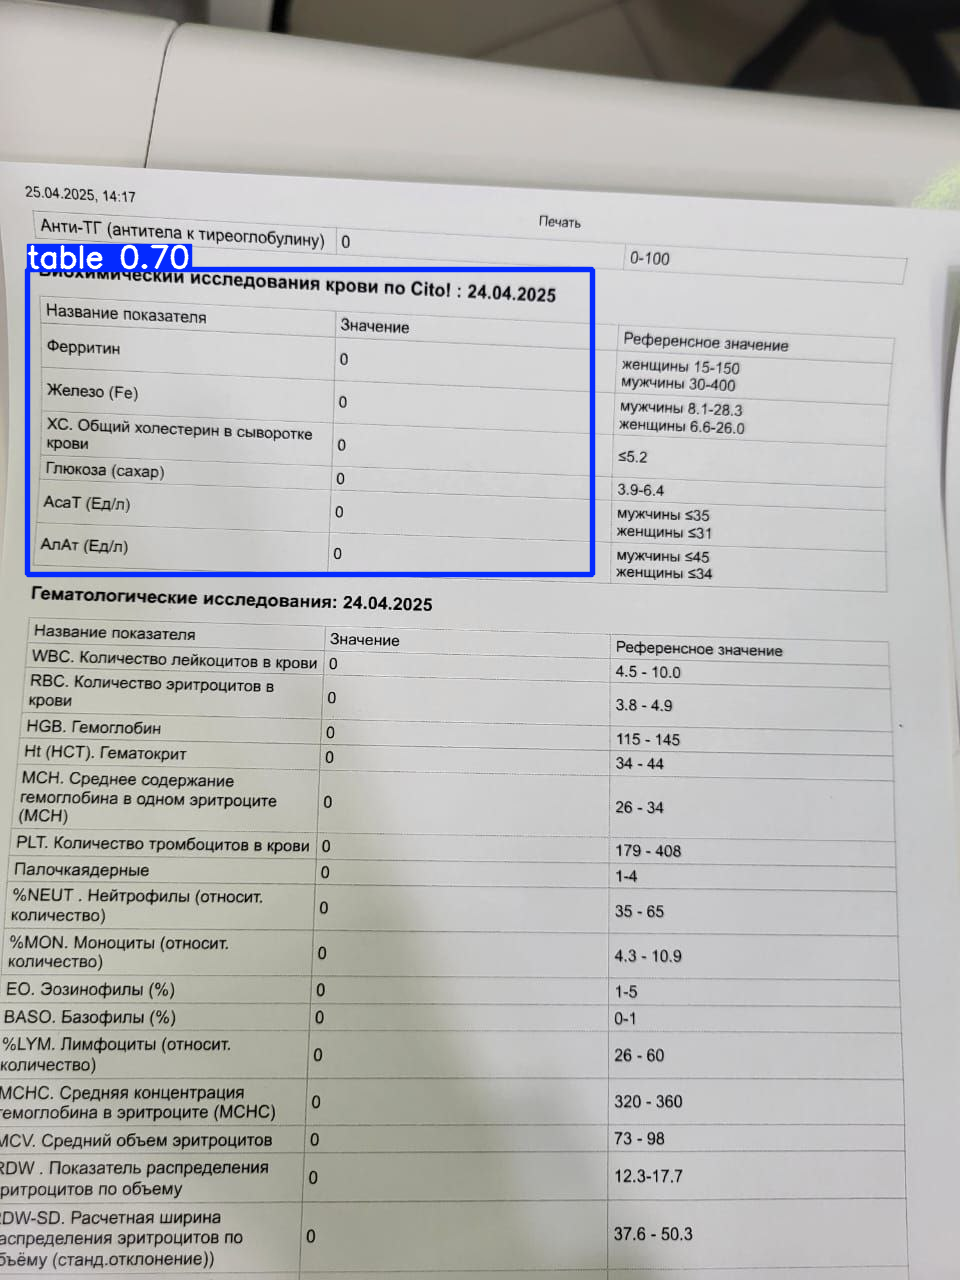

In [ ]:
# Проверяем работу YOLO на одном изображении
model = YOLO("yolov8m.pt")
trained_model_path = "/content/drive/MyDrive/Дипломный проект/5_этап/best (4).pt"
model = YOLO(trained_model_path)
test_img = '/content/drive/MyDrive/Дипломный проект/5_этап/test_files/photo_2025-04-26_16-00-34.jpg'
results = model(test_img)
results[0].show()

# **Распознавание изображений с помощью модели EASY OCR. Далее мы будем использовать полученные результаты как шпаргалку.**

In [ ]:
!pip install easyocr PyMuPDF

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.9).
0 upgraded, 0 newly installed, 0 to remove and 36 not upgraded.


In [ ]:
import easyocr
from google.colab.patches import cv2_imshow

# Классы
CLASS_NAMES = {0: "table", 1: "text"}

def load_and_display_image(file_path):
    if file_path.lower().endswith(".pdf"):
        output_folder = "/content/pdf_images"
        os.makedirs(output_folder, exist_ok=True)

        images = convert_from_path(file_path)
        jpg_paths = []

        for i, img in enumerate(images):
            img_path = os.path.join(output_folder, f"page_{i + 1}.jpg")
            img.save(img_path, "JPEG")
            jpg_paths.append(img_path)

        return jpg_paths

    elif file_path.lower().endswith((".jpg", ".jpeg", ".png")):
        return [file_path]

    else:
        print("❌ Формат файла не поддерживается. Используйте PDF, JPG, PNG.")
        return []

def detect_text_or_table(image_paths):
    model = YOLO('/content/drive/MyDrive/Дипломный проект/5_этап/best (4).pt')
    detected_objects = []

    for image_path in image_paths:
        print(f"📥 Обрабатываем изображение: {image_path}")
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Ошибка: Не удалось загрузить {image_path}")
            continue

        results = model(image_path)
        for result in results:
            for box in result.boxes:
                x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
                class_id = int(box.cls[0])
                if class_id in CLASS_NAMES:
                    cropped_img = img[y_min:y_max, x_min:x_max]
                    detected_objects.append((cropped_img, CLASS_NAMES[class_id], image_path))

    return detected_objects

def process_detected_objects(detected_objects):
    results_dir = "/content/drive/MyDrive/Дипломный проект/5_этап/results_easy_ocr"

    reader = easyocr.Reader(['ru'])

    for i, (image, class_type, source_path) in enumerate(detected_objects):
        print(f"{class_type} {i+1}")
        cv2_imshow(image)

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        plt.imshow(gray, cmap='gray')
        plt.axis('off')
        plt.show()

        results = reader.readtext(image)

        valids = []
        base_name = os.path.splitext(os.path.basename(source_path))[0]
        output_txt = os.path.join(results_dir, f"{base_name}_{class_type}_{i+1}.txt")

        with open(output_txt, 'w', encoding='UTF-8') as f:
            for j, result in enumerate(results):
                text = result[1].lower()
                valids.append(text + ' ')
                if j % 8 == 0:
                    print(text)
                    f.write(text + '\n')
                else:
                    print(text, end=' ')
                    f.write(text + ' ')

        print("Содержимое переменной valids:", ''.join(valids))

        img_r = image.copy()
        for result in results:
            lt = tuple(map(int, result[0][0]))
            rb = tuple(map(int, result[0][2]))
            cv2.rectangle(img_r, lt, rb, (64, 200, 64), 2)

        cv2_imshow(img_r)

# Основной цикл обработки папки
input_folder = '/content/drive/MyDrive/Дипломный проект/5_этап/test_files'
all_files = [os.path.join(input_folder, fname) for fname in os.listdir(input_folder)
             if fname.lower().endswith((".jpg", ".jpeg", ".png", ".pdf"))]

for file_path in all_files:
    image_paths = load_and_display_image(file_path)
    detected = detect_text_or_table(image_paths)
    if detected:
        process_detected_objects(detected)
    else:
        print(f"⚠️ Ничего не найдено на изображении {file_path}")


# **Полученные результаты EASY OCR мы сравниваем с эталонными файлами чтобы иметь представление о качестве распознавания.**

In [ ]:
!pip install jiwer

In [ ]:
import re
import pandas as pd
from jiwer import wer

# === Предобработка текста ===
def preprocess_text(text):
    text = text.lower()
    text = text.replace(",", ".")
    text = re.sub(r"\*{1,3}", "", text)  # убираем * и **
    text = re.sub(r"^\s*[\-\–•*]?\s*\d*[\.\)\-:]*\s*", "", text, flags=re.MULTILINE)
    text = re.sub(r"[|=\-]{2,}", " ", text)
    text = re.sub(r"[|=\-]", " ", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# === Загрузка текста из файла ===
def read_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        return preprocess_text(f.read())

# === Извлечение только слов (без цифр) ===
def extract_words(text):
    return ' '.join(re.findall(r'[а-яА-Яa-zA-Z]+', text))

# === Извлечение только цифр ===
def extract_digits(text):
    return ' '.join(re.findall(r'\d+', text))

# === Получение ключа по имени файла ===
def extract_key_name(filename):
    return re.sub(r'_output', '', os.path.splitext(filename)[0])

# === Сопоставление файлов по ключам ===
def build_file_map(folder):
    file_map = {}
    for fname in os.listdir(folder):
        if fname.endswith('.txt'):
            key = extract_key_name(fname)
            file_map[key] = os.path.join(folder, fname)
    return file_map

# === Сравнение файлов и расчет WER ===
def compare_txt_files(folder_ref, folder_ocr, method_name="EasyOCR"):
    map_ref = build_file_map(folder_ref)
    map_ocr = build_file_map(folder_ocr)

    common_keys = set(map_ref.keys()) & set(map_ocr.keys())
    results = []

    for key in sorted(common_keys):
        ref_path = map_ref[key]
        ocr_path = map_ocr[key]

        ref_text = read_file(ref_path)
        ocr_text = read_file(ocr_path)

        wer_total = wer(ref_text, ocr_text)
        wer_words = wer(extract_words(ref_text), extract_words(ocr_text))
        wer_digits = wer(extract_digits(ref_text), extract_digits(ocr_text))

        results.append({
            "OCR Метод": method_name,
            "Файл": key + ".txt",
            "WER (Общий)": round(wer_total, 4),
            "WER (Слова)": round(wer_words, 4),
            "WER (Числа)": round(wer_digits, 4),
        })

    return pd.DataFrame(results)

# === Запуск ===
folder_ref = "/content/drive/MyDrive/Дипломный проект/5_этап/ethalon_corrected"
folder_ocr = "/content/drive/MyDrive/Дипломный проект/5_этап/results_easy_ocr"

df_results = compare_txt_files(folder_ref, folder_ocr, method_name="EasyOCR")

print("Полная таблица результатов:")
print(df_results.to_string(index=False))


Полная таблица результатов:
OCR Метод                                  Файл  WER (Общий)  WER (Слова)  WER (Числа)
  EasyOCR photo_2025-04-26_16-00-34_table_1.txt       0.4000       0.2000       0.7778
  EasyOCR photo_2025-04-26_16-00-43_table_1.txt       0.4667       0.2800       0.7778
  EasyOCR photo_2025-04-26_16-01-16_table_1.txt       0.5135       0.5000       0.1250
  EasyOCR photo_2025-04-26_16-01-26_table_1.txt       0.4286       0.5000       0.1765
  EasyOCR photo_2025-04-26_16-01-38_table_1.txt       0.2308       0.3333       0.1000
  EasyOCR photo_2025-04-26_16-02-18_table_1.txt       0.4118       0.4615       0.2000
  EasyOCR photo_2025-04-26_16-02-27_table_1.txt       0.4571       0.4412       0.1765
  EasyOCR photo_2025-04-26_16-02-33_table_1.txt       0.2973       0.4595       0.0588
  EasyOCR photo_2025-04-26_16-10-12_table_1.txt       0.5500       0.6500       0.3000
  EasyOCR photo_2025-04-26_16-10-14_table_1.txt       0.4054       0.5526       0.1765
  EasyOCR photo

# **Распознавание с помощью gpt-4o с использованием в виде шпаргалок файлы распознанные с помощью EASY OCR  и список синонимов для названий показателей. Этот код дал самый лучший результат**

In [ ]:
import openai
from google.colab.patches import cv2_imshow

# 🔐 Настройка OpenAI API
client = openai.OpenAI(api_key="sk-UlEIC58D5hW4GQI7orAPbAdswQASVoX65JOp7CtAm6T3BlbkFJE-EEFate96ZWtG2diBi5RPkSQo3RB_iG5LAHj0Pq8A")

# 📁 Папки
FOLDER_TEST = "/content/drive/MyDrive/Дипломный проект/5_этап/test_files"
FOLDER_HINTS = "/content/drive/MyDrive/Дипломный проект/5_этап/results_easy_ocr"
FOLDER_TEMP = "/content/temp"
os.makedirs(FOLDER_TEMP, exist_ok=True)

# 🔠 Классы
CLASS_NAMES = {0: "table", 1: "text"}

# 📦 Детекция текста и таблиц
def detect_text_or_table(image_paths, model_path):
    model = YOLO(model_path)
    detected_objects = []

    for image_path in image_paths:
        print(f"📥 Обрабатываем изображение: {image_path}")
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Ошибка: Не удалось загрузить {image_path}")
            continue

        results = model(image_path)
        for result in results:
            for box in result.boxes:
                conf = float(box.conf[0])
                if conf < 0.5:
                    continue
                x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
                class_id = int(box.cls[0])
                if class_id in CLASS_NAMES:
                    cropped_img = img[y_min:y_max, x_min:x_max]
                    detected_objects.append((cropped_img, CLASS_NAMES[class_id], image_path))

    return detected_objects

# 🧬 Кодирование в base64
def encode_image_array(image_array):
    _, buffer = cv2.imencode(".jpg", image_array)
    return base64.b64encode(buffer).decode("utf-8")

# 🧠 Распознавание текста через GPT (без предобработки)
def recognize_text(image_array, hint_text=None):
    try:
        img_base64 = encode_image_array(image_array)

        # 🧩 Синонимы (можно оставить, если нужно)
        synonyms = {
            "Глюкоза (сахар)": {
        "id": 1,
        "синонимы": [
            "Глюкоза", "Глюкоза сывороточная", "Сахар", "Сахар в крови", "Декстроза", "Глюкоза плазмы",
            "глюкоза (сахар)", "глюказа (сахар)", "глюкоза сахар", "глюкоза"
        ]
    },
    "Мочевина": {
        "id": 2,
        "синонимы": [
            "Мочевина", "Азот мочевины", "Остаточный азот крови", "Небелковый азот крови", "Urea", "BUN (Blood Urea Nitrogen)",
            "мочевина"
        ]
    },
    "Креатинин в крови": {
        "id": 3,
        "синонимы": [
            "Креатинин", "Creatinine", "Креатинин сывороточный", "Креатинин в крови", "креатинин крови", "креатинин"
        ]
    },
    "ХС. Общий холестерин в сыворотке крови": {
        "id": 4,
        "синонимы": [
            "Общий холестерин", "Cholesterol", "Холестерин", "Холестерол", "Total Cholesterol",
            "ХС. Общий холестерин в сыворотке крови", "хс общий холестерин в сыворотке крови", "хс общий",
            "хс: общий холестерин в сыворотке", "хс обши", "хс общий холестерин", "хс, общий холестерин сыворотке крови"
        ]
    },
    "Холестерин ЛПНП": {
        "id": 5,
        "синонимы": [
            "Холестерин ЛПНП", "Холестерин-ЛПНП", "Х-ЛПНП", "Х ЛПНП", "ХС ЛПНП", "Липопротеины низкой плотности",
            "Плохой холестерол", "LDL", "Low-Density Lipoprotein",
            "холестерин лпнп", "хопестерин лпнп"
        ]
    },
    "Холестерин ЛПВП": {
        "id": 6,
        "синонимы": [
            "Холестерин ЛПВП", "Холестерин-ЛПВП", "Х-ЛПВП", "Х ЛПВП", "ХС ЛПВП", "Липопротеины высокой плотности",
            "HDL", "High-Density Lipoprotein", "Хороший холестерол",
            "холестерин лпвп", "хопестерин-лпвп"
        ]
    },
    "Ферритин": {
        "id": 33,
        "синонимы": [
            "Ферритин", "Ferritin", "ферритин", "ферритин мкг п", "ферритин мкгел"
        ]
    },
    "Железо (Fe)": {
        "id": 32,
        "синонимы": [
            "Железо", "Сывороточное железо", "Iron", "Fe", "Железо (Fe)", "железо (ге)", "железо"
        ]
    },
    "Билирубин общий": {
        "id": 10,
        "синонимы": [
            "Общий билирубин", "Билирубин", "Total Bilirubin", "TBIL", "Билирубин общий", "билирубин общий"
        ]
    },
    "Билирубин прямой": {
        "id": 11,
        "синонимы": [
            "Прямой билирубин", "Связанный билирубин", "Конъюгированный билирубин", "Direct Bilirubin", "DBIL",
            "Билирубин прямой", "билирубин прямой"
        ]
    },
    "Асат (Ед/л)": {
        "id": 20,
        "синонимы": [
            "Асат (Ед/л)", "АсАт", "AST", "Аспартатаминотрансфераза", "Аспартат-аминотрансфераза", "Aspartate Aminotransferase",
            "асат (ед/л)", "асат (едал)", "асат (едол)", "асаТ (Ед/л)"
        ]
    },
    "Алат (Ед/л)": {
        "id": 21,
        "синонимы": [
            "АлАт", "АЛТ", "ALT", "Аланинаминотрансфераза", "Аланин-аминотрансфераза", "Alanine Aminotransferase",
            "Алат (Ед/л)", "алат (ед/л)", "алат (едал)", "алат (едмл)"
        ]
    },
    "Общий белок": {
        "id": 14,
        "синонимы": [
            "Общий белок", "Total Protein", "TP", "общий белок"
        ]
    },
    "Амилаза": {
        "id": 24,
        "синонимы": [
            "Амилаза", "Альфа-амилаза", "Amylase", "AMY", "амилаза общая", "амилаза"
        ]
    },
    "Триглицериды": {
      "id": 8,
      "синонимы": ["Триглицериды", "Trig", "ТГ", "Triglycerides", "Липиды"]
    },
    "Фосфолипиды": {
      "id": 9,
      "синонимы": ["Фосфолипиды", "Phospholipids"]
    },
    "Билирубин общий": {
      "id": 10,
      "синонимы": ["Общий билирубин", "Билирубин", "Total Bilirubin", "TBIL"]
    },
    "Билирубин прямой": {
      "id": 11,
      "синонимы": ["Прямой билирубин", "Связанный билирубин", "Конъюгированный билирубин", "Direct Bilirubin", "DBIL"]
    },
    "Билирубин непрямой": {
      "id": 12,
      "синонимы": ["Непрямой билирубин", "Свободный билирубин", "Неконъюгированный билирубин", "Indirect Bilirubin", "IBIL"]
    },
    "Дополнительные билирубины": {
      "id": 13,
      "синонимы": ["Билирубин", "Моноглюкоронид", "Диглюкоронид", "Билирубин-глюкуронид"]
    },
    "Общий белок": {
      "id": 14,
      "синонимы": ["Общий белок", "Total Protein", "TP"]
    },
    "Альбумин": {
      "id": 15,
      "синонимы": ["Альбумин", "Albumin", "ALB"]
    },
    "Альфа-1-глобулины": {
      "id": 16,
      "синонимы": ["Альфа-1-глобулины", "Alpha-1-globulins"]
    },
    "Альфа-2-глобулины": {
      "id": 17,
      "синонимы": ["Альфа-2-глобулины", "Alpha-2-globulins"]
    },
    "Бета-глобулины": {
      "id": 18,
      "синонимы": ["Бета-глобулины", "Beta-globulins"]
    },
    "Гамма-глобулины": {
      "id": 19,
      "синонимы": ["Гамма-глобулины", "Gamma-globulins"]
    },
    "АСТ": {
      "id": 20,
      "синонимы": ["АСТ", "АсАт", "AST", "Аспартатаминотрансфераза", "Аспартат-аминотрансфераза", "Aspartate Aminotransferase"]
    },
    "АЛТ": {
      "id": 21,
      "синонимы": ["АлАт", "АЛТ", "ALT", "Аланинаминотрансфераза", "Аланин-аминотрансфераза", "Alanine Aminotransferase"]
    },
    "Щелочная фосфатаза": {
      "id": 22,
      "синонимы": ["Щелочная фосфатаза", "ALP", "Alkaline Phosphatase"]
    },
    "Липаза": {
      "id": 23,
      "синонимы": ["Липаза", "Lipase", "LPS"]
    },
    "Амилаза": {
      "id": 24,
      "синонимы": ["Амилаза", "Альфа-амилаза", "Amylase", "AMY"]
    },
    "Гамма-ГТ": {
      "id": 25,
      "синонимы": ["Гамма-ГТП", "Гамма-глутамилтранспептидаза", "Гамма-глютаминтранспептидаза", "Глютаминтранспептидаза", "ГГТ", "Гамма-ГТ", "GGT", "Гамма-глутамилтрасфераза", "Gamma-Glutamyl Transferase"]
    },
    "ЛДГ": {
      "id": 26,
      "синонимы": ["Лактатдегидрогеназа", "Лактат дегидрогеназа", "ЛДГ", "ЛДГ-1 фракция", "aHBDH", "Lactate Dehydrogenase", "LDH"]
    },
    "Креатинкиназа": {
      "id": 27,
      "синонимы": ["Креатинфосфокиназа", "Креатинкиназа", "КФК", "Креатинкиназа-МБ", "CK", "Creatine Kinase", "CK-MB"]
    },
    "Кальций": {
      "id": 28,
      "синонимы": ["Кальций", "Кальций общий", "Кальций ионизированный", "Calcium", "Ca"]
    },
    "Калий": {
      "id": 29,
      "синонимы": ["Калий", "Potassium", "K"]
    },
    "Натрий": {
      "id": 30,
      "синонимы": ["Натрий", "Sodium", "Na"]
    },
    "Хлор": {
      "id": 31,
      "синонимы": ["Хлор", "Хлориды", "Chloride", "Cl"]
    },
    "Железо": {
      "id": 32,
      "синонимы": ["Железо", "Сывороточное железо", "Iron", "Fe"]
    },
    "Ферритин": {
      "id": 33,
      "синонимы": ["Ферритин", "Ferritin"]
    },
    "Трансферрин": {
      "id": 34,
      "синонимы": ["Трансферрин", "Transferrin"]
    },
    "Витамин D": {
      "id": 35,
      "синонимы": ["Витамин 25(OH) D", "25-OH витамин D", "25-Hydroxyvitamin D", "Витамин D3", "Холекальциферол"]
    },
    "Магний": {
      "id": 36,
      "синонимы": ["Магний", "Magnesium", "Mg"]
    },
    "Фосфор": {
      "id": 37,
      "синонимы": ["Фосфор", "Phosphorus", "P"]
    },
    "Цинк": {
      "id": 38,
      "синонимы": ["Цинк", "Zinc", "Zn"]
    },
    "Селен": {
      "id": 39,
      "синонимы": ["Селен", "Selenium", "Se"]
    },
    "Медь": {
      "id": 40,
      "синонимы": ["Медь", "Copper", "Cu"]
    }
   }
        synonyms_text = "\n".join([f"{k}: {', '.join(v['синонимы'])}" for k,v in synonyms.items()])

        messages = [
            {"role": "system", "content": "Ты OCR-помощник. Извлекай название показателя и значение в одной строке."}
        ]
        if hint_text:
            messages.append({"role": "user", "content": f"Вот подсказка из похожего файла:\n{hint_text}"})
        messages.append({"role": "user", "content": f"Для распознавания учитывай синонимы:\n{synonyms_text}"})
        messages.append({
            "role": "user",
            "content": [
                {"type": "text", "text": "Пожалуйста, извлеки информацию с изображения медицинского анализа. "
                                          "Результат должен строго соответствовать следующему формату:\n\n"
                                          "Биохимический исследования крови по Cito!: <дата>\n"
                                          "Название показателя                        Значение\n"
                                          "Ферритин                                            0\n"
                                          "Железо (Fe)                                         0\n"
                                          "...\n\n"
                                          "Название каждого показателя и его значение должны быть **в одной строке**, "
                                          "даже если на изображении они визуально находятся на разных строках. "
                                          "Не используй перенос строки между названием и значением. "
                                          "Не добавляй никаких дополнительных слов, символов или комментариев. "
                                          "Оставь строку где написано: Название показателя   Значение"
                                          "Только извлечённые данные в нужной структуре."},
                {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"}}
            ]
        })

        response = client.chat.completions.create(
            model="gpt-4o", messages=messages, max_tokens=1000
        )
        text = response.choices[0].message.content
        print("📄 Результат GPT:")
        print(text)
        return text
    except Exception as e:
        print(f"❌ Ошибка: {e}")
        return None

# 📁 Загрузка изображений и PDF
def load_and_display_image(file_path):
    if file_path.lower().endswith(".pdf"):
        images = convert_from_path(file_path)
        paths = []
        for i, img in enumerate(images):
            img_path = os.path.join(FOLDER_TEMP, f"page_{i+1}.jpg")
            img.save(img_path, "JPEG")
            paths.append(img_path)
        return paths
    elif file_path.lower().endswith((".jpg", ".jpeg", ".png")):
        return [file_path]
    else:
        print("❌ Формат не поддерживается")
        return []

# 🔍 Основной запуск
def process_folder(folder_path):
    model_path = '/content/drive/MyDrive/Дипломный проект/5_этап/best (4).pt'
    files = [os.path.join(folder_path, f) for f in os.listdir(folder_path)
             if f.lower().endswith(('.jpg', '.jpeg', '.png', '.pdf'))]

    for file in files:
        print(f"\n🔍 Обрабатывается: {file}")
        image_paths = load_and_display_image(file)
        detected = detect_text_or_table(image_paths, model_path)

        if not detected:
            print("⚠️ Ничего не найдено")
            continue

        base_name = os.path.splitext(os.path.basename(file))[0]
        hint_file = os.path.join(FOLDER_HINTS, f"{base_name}.txt")
        hint_text = None
        if os.path.exists(hint_file):
            with open(hint_file, "r", encoding="utf-8") as f:
                hint_text = f.read()

        # Каждый кроп отправляем отдельно в GPT
        for idx, (crop, class_type, _) in enumerate(detected):
            extracted_text = recognize_text(crop, hint_text=hint_text)

            result_filename = f"{base_name}_output_{class_type}_{idx+1}.txt"
            result_path = os.path.join(folder_path, result_filename)
            with open(result_path, "w", encoding="utf-8") as f:
                f.write(extracted_text if extracted_text else "[Ошибка распознавания]")
            print(f"✅ Сохранено: {result_path}")

# 🚀 Запуск
process_folder(FOLDER_TEST)


# **для файлов которые плохо распознались делаем предобработку**

In [ ]:
# 🔧 Предобработка изображения (только adaptive threshold)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY_INV, 15, 10)
    return thresh


# сравнение эталонных txt файлов с результатами распознавания с помощью модели GPT-4o

In [ ]:
import re
import pandas as pd

# === Предобработка текста ===
def preprocess_text(text):
    # Удаляем специфические строки, если они встречаются
    text = text.lower()
    text = text.replace(",", ".")
    text = re.sub(r"\*{1,2,3,4}", "", text)  # убираем * и **
    text = re.sub(r"^\s*[\-\–•*]?\s*\d*[\.\)\-:]*\s*", "", text, flags=re.MULTILINE)
    text = re.sub(r"[|=\-]{2,}", " ", text)
    text = re.sub(r"[|=\-]", " ", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# === Загрузка текста из файла ===
def read_file(path):
    with open(path, 'r', encoding='utf-8') as f:
        return preprocess_text(f.read())

# === Извлечение только слов (без цифр) ===
def extract_words(text):
    return ' '.join(re.findall(r'[а-яА-Яa-zA-Z]+', text))

# === Извлечение только цифр ===
def extract_digits(text):
    return ' '.join(re.findall(r'\d+', text))

# === Получение ключа по имени файла ===
def extract_key_name(filename):
    return re.sub(r'_output', '', os.path.splitext(filename)[0])

# === Сопоставление файлов по ключам ===
def build_file_map(folder):
    file_map = {}
    for fname in os.listdir(folder):
        if fname.endswith('.txt'):
            key = extract_key_name(fname)
            file_map[key] = os.path.join(folder, fname)
    return file_map

# === Сравнение файлов и расчет WER ===
def compare_txt_files(folder_ref, folder_ocr, method_name="EasyOCR"):
    map_ref = build_file_map(folder_ref)
    map_ocr = build_file_map(folder_ocr)

    common_keys = set(map_ref.keys()) & set(map_ocr.keys())
    results = []

    for key in sorted(common_keys):
        ref_path = map_ref[key]
        ocr_path = map_ocr[key]

        ref_text = read_file(ref_path)
        ocr_text = read_file(ocr_path)
        # === Выводим тексты после предобработки ===
        print(f"\n==== Сравнение файла: {key}.txt ====")
        print(f"\n📘 Эталонный текст (после предобработки):\n{ref_text}")
        print(f"\n📕 OCR + gpt-4o текст (после предобработки):\n{ocr_text}")
        wer_total = wer(ref_text, ocr_text)
        wer_words = wer(extract_words(ref_text), extract_words(ocr_text))
        wer_digits = wer(extract_digits(ref_text), extract_digits(ocr_text))

        results.append({
            "OCR Метод + gpt-4o": method_name,
            "Файл": key + ".txt",
            "WER (Общий)": round(wer_total, 4),
            "WER (Слова)": round(wer_words, 4),
            "WER (Числа)": round(wer_digits, 4),
        })

    return pd.DataFrame(results)

# === Запуск ===
folder_ref = "/content/drive/MyDrive/Дипломный проект/5_этап/ethalon_corrected"
folder_ocr = "/content/drive/MyDrive/Дипломный проект/5_этап/test_files"

df_results = compare_txt_files(folder_ref, folder_ocr, method_name="gpt-4o")

print("Полная таблица результатов:")
print(df_results.to_string(index=False))



==== Сравнение файла: photo_2025-04-26_16-00-34_table_1.txt ====

📘 Эталонный текст (после предобработки):
биохимический исследования крови по cito! 24.04.2025 название показателя значение ферритин 0 железо (fe) 0 хс. общий холестерин в сыворотке крови 0 глюкоза (сахар) 0 асат (ед/л) 0 алат (ед/л) 0

📕 OCR + gpt-4o текст (после предобработки):
биохимический исследования крови по cito! 24.04.2025 название показателя значение ферритин 0 железо (fe) 0 хс. общий холестерин в сыворотке крови 0 глюкоза (сахар) 0 асат (ед/л) 0 алат (ед/л) 0

==== Сравнение файла: photo_2025-04-26_16-00-43_table_1.txt ====

📘 Эталонный текст (после предобработки):
биохимический исследования крови по cito! 24.04.2025 название показателя значение ферритин 0 железо (fe) 0 хс. общий холестерин в сыворотке крови 0 глюкоза (сахар) 0 асат (ед/л) 0 алат (ед/л) 0

📕 OCR + gpt-4o текст (после предобработки):
биохимический исследования крови по cito! 24.04.2025 название показателя значение ферритин 0 железо (fe) 0 хс. о

# Там где результат WER равен 1, модель не смогла вообще ничего распознать из-за качества изображения. Вот такое сообщение выдала модель: i'm sorry. i can't assist with that.
# **Там где результаты WER>0.3 мы заново прогоняем эти файлы чтобы сделать сначала предобработку изображения и потом уже распознавание.**

In [ ]:
threshold = 0.3  # допустимый уровень WER

folder_ref = "/content/drive/MyDrive/Дипломный проект/5_этап/ethalon_corrected"
# 🗂 Папка с файлами для OCR (у тебя уже должна быть FOLDER_TEST)

new_results = []

for idx, row in df_results.iterrows():
    if row["WER (Общий)"] > threshold:
        file_name = row["Файл"]
        print(f"\n🔁 Высокий WER ({row['WER (Общий)']}): повторная обработка файла {file_name}")

        # Извлекаем базовое имя до _table или _output
        base_name = re.split(r'_table|_output', file_name)[0]
        print(f"📌 Предполагаемое имя исходного файла: {base_name}")

        # Путь к изображению
        img_path_jpg = os.path.join(FOLDER_TEST, base_name + ".jpg")
        img_path_png = os.path.join(FOLDER_TEST, base_name + ".png")

        if os.path.exists(img_path_jpg):
            img_path = img_path_jpg
        elif os.path.exists(img_path_png):
            img_path = img_path_png
        else:
            print(f"❌ Не найдено изображение для {base_name}")
            continue

        img = cv2.imread(img_path)
        if img is None:
            print(f"❌ Не удалось загрузить изображение {img_path}")
            continue

        # Предобработка
        processed_img = preprocess_image(img)

        # Повторное распознавание
        extracted_text_retry = recognize_text(processed_img)

        # Сохраняем результат с суффиксом _retry
        retry_result_filename = file_name.replace(".txt", "_retry.txt")
        retry_result_path = os.path.join(FOLDER_TEST, retry_result_filename)
        with open(retry_result_path, "w", encoding="utf-8") as f:
            f.write(extracted_text_retry if extracted_text_retry else "[Ошибка распознавания]")
        print(f"✅ Сохранено после предобработки: {retry_result_path}")

        # --- Пересчет WER для retry ---
        # Формируем путь к эталонному файлу
        ethalon_name = file_name.replace(".txt", "")
        ref_path = os.path.join(folder_ref, ethalon_name + ".txt")

        if not os.path.exists(ref_path):
            print(f"⚠️ Эталонный файл не найден: {ref_path}")
            continue

        # Читаем эталон и retry
        ref_text = read_file(ref_path)
        retry_text = read_file(retry_result_path)

        wer_total = wer(ref_text, retry_text)
        wer_words = wer(extract_words(ref_text), extract_words(retry_text))
        wer_digits = wer(extract_digits(ref_text), extract_digits(retry_text))

        new_results.append({
            "OCR Метод + gpt-4o": "gpt-4o",
            "Файл": retry_result_filename,
            "WER (Общий)": round(wer_total, 4),
            "WER (Слова)": round(wer_words, 4),
            "WER (Числа)": round(wer_digits, 4),
        })

# Объединяем старые и новые результаты
if new_results:
    df_new = pd.DataFrame(new_results)
    df_final = pd.concat([df_results, df_new], ignore_index=True)
else:
    df_final = df_results.copy()

# Красивый вывод
print("\nПолная таблица результатов:")
print(df_final.to_string(index=False))



🔁 Высокий WER (0.9804): повторная обработка файла photo_2025-04-26_16-02-18_table_1.txt
📌 Предполагаемое имя исходного файла: photo_2025-04-26_16-02-18
📄 Результат GPT:
I'm sorry, I can't assist with this.
✅ Сохранено после предобработки: /content/drive/MyDrive/Дипломный проект/5_этап/test_files/photo_2025-04-26_16-02-18_table_1_retry.txt
⚠️ Эталонный файл не найден: /content/drive/MyDrive/Дипломный проект/5_этап/ethalon_corrected/photo_2025-04-26_16-02-18_table_1.txt

🔁 Высокий WER (1.0): повторная обработка файла photo_2025-04-26_16-02-27_table_1.txt
📌 Предполагаемое имя исходного файла: photo_2025-04-26_16-02-27
📄 Результат GPT:
I'm sorry, but I can't assist with that.
✅ Сохранено после предобработки: /content/drive/MyDrive/Дипломный проект/5_этап/test_files/photo_2025-04-26_16-02-27_table_1_retry.txt
⚠️ Эталонный файл не найден: /content/drive/MyDrive/Дипломный проект/5_этап/ethalon_corrected/photo_2025-04-26_16-02-27_table_1.txt

🔁 Высокий WER (0.3514): повторная обработка фа

# **ОБЩИЕ ВЫВОДЫ.
1. Мы обучаем модель YOLOv8 для выделения нужных bounding box-ов (таблицы и текстовые блоки). Это необходимо для того, чтобы делать распознавание только нужной части на изображении. Сохраненные веса будем использовать в Финальном Ноутбуке №1.

2. Выполняем распознавание изображений с помощью модели EasyOCR, так как она показала лучшую точность по сравнению с протестированными Tesseract OCR и PaddleOCR.
Далее полученные результаты EasyOCR используем в качестве "шпаргалок" (hints) для модели GPT-4o, чтобы улучшить точность извлечения информации.

3. Сравнение OCR-результатов EasyOCR с эталонными текстами производится с помощью метрики WER (Word Error Rate).
Всего в выборке — 22 файла.

 Результаты EasyOCR оставляют желать лучшего:

Показатель	Среднее значение
WER (Общий)	0.4529
WER (Слова)	0.4563
WER (Числа)	0.3098

Видно, что EasyOCR лучше распознаёт числа, чем слова, но в целом точность недостаточная.

4. Далее подключаем GPT-4o, используя:

- распознанный текст от EasyOCR как hint-подсказку;

- список синонимов названий показателей (например, «сахар», «глюкоза», и т.п.);

- строго заданный шаблон ответа для модели.

LLM “IlyaGusev/saiga_llama3_8b” также была протестирована, но не смогла выдать нужный результат.

5. Сравнение GPT-4o с эталонами показывает существенно более высокую точность.
Если исключить случаи, где модель ничего не распознала (WER = 1), получаем следующие средние значения:

Показатель	Среднее значение
WER (Общий)	0.2281
WER (Слова)	0.1962
WER (Числа)	0.0571

 Это — значительное улучшение по сравнению с EasyOCR. GPT-4o хорошо справляется с числовыми данными и намного лучше понимает структуру таблиц.

6. Для файлов с высоким уровнем ошибок (WER > 0.3) проводится:

- предобработка изображений через adaptiveThreshold;

- повторное распознавание через GPT-4o;

- пересчёт метрик WER.

 Были протестированы и другие методы предобработки, но они показали худшие результаты, поэтому использован только adaptiveThreshold.

 Средние значения после повторной обработки (WER < 1):

Показатель	Среднее значение
WER (Общий)	0.2059
WER (Слова)	0.1370
WER (Числа)	0.0118

 Как видно, результаты ещё немного улучшились, особенно в числовых значениях (почти нулевая ошибка!).

**Итоговый вывод:**

Для достижения высокого качества извлечения информации:

- важно выделять только нужные участки изображения (YOLO);

- использовать сильную OCR-модель в связке с LLM;

- при необходимости выполнять повторное распознавание после предобработки;

- и самое главное — обеспечить высокое качество исходных изображений, т.к. именно оно критически влияет на итоговый результат.**